___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

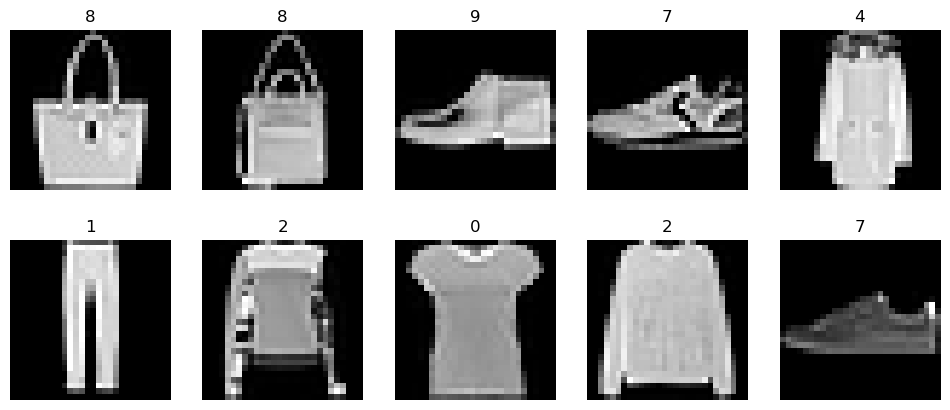

In [9]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(x_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(x_train[idx], cmap="gray")
plt.show()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

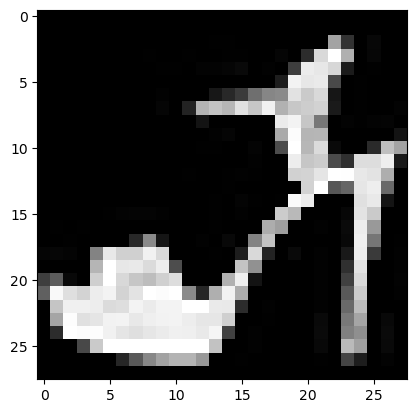

In [11]:
plt.imshow(x_train[9], cmap="gray")
plt.show()

In [12]:
y_train[9]

5

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
x_train.min()

0

In [14]:
x_train.max()

255

In [15]:
# Normalize image pixels
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [16]:
x_train.min()

0.0

In [17]:
x_train.max()

1.0

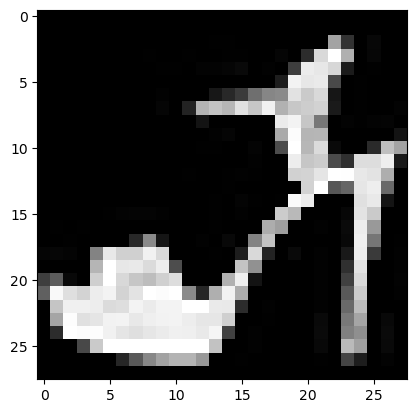

In [18]:
plt.imshow(x_train[9], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [21]:
X_train = np.expand_dims(x_train, 3)
X_test = np.expand_dims(x_test, 3)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[9]

5

In [28]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 17500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2240128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [34]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3727 - accuracy: 0.8675 - val_loss: 0.3306 - val_accuracy: 0.8718
Epoch 2/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2514 - accuracy: 0.9077 - val_loss: 0.2706 - val_accuracy: 0.9021
Epoch 3/20
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2048 - accuracy: 0.9252 - val_loss: 0.2596 - val_accuracy: 0.9074
Epoch 4/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1690 - accuracy: 0.9370 - val_loss: 0.2617 - val_accuracy: 0.9115
Epoch 5/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1384 - accuracy: 0.9484 - val_loss: 0.2755 - val_accuracy: 0.9119
Epoch 6/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1153 - accuracy: 0.9572 - val_loss: 0.2876 - val_accuracy: 0.9139
Epoch 7/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0927 - accuracy: 0.9656 - val_loss: 0.3030 -

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.372711,0.867517,0.330617,0.8718
1,0.251430,0.907667,0.270561,0.9021
2,0.204805,0.925250,0.259608,0.9074
3,0.169010,0.937017,0.261703,0.9115
4,0.138432,0.948383,0.275493,0.9119


**TASK 7: Plot values of metrics you used in your model.**

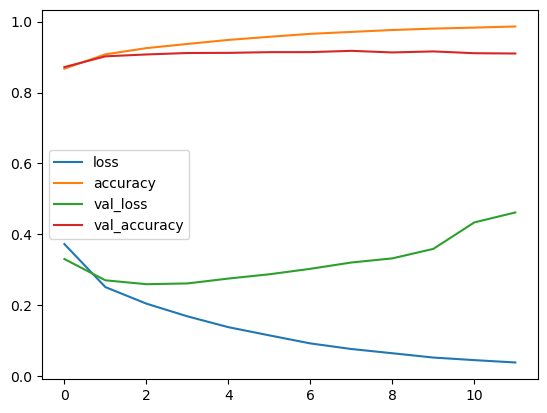

In [36]:
loss_df.plot();

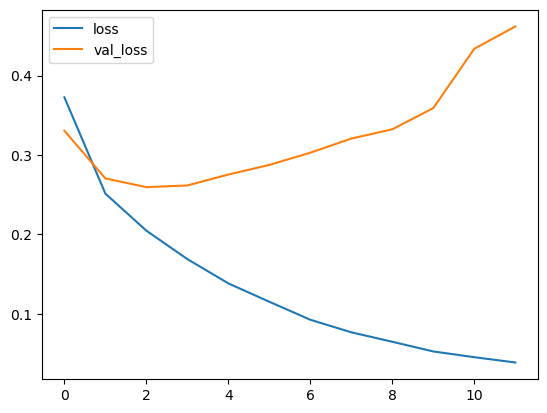

In [37]:
loss_df[["loss", "val_loss"]].plot();

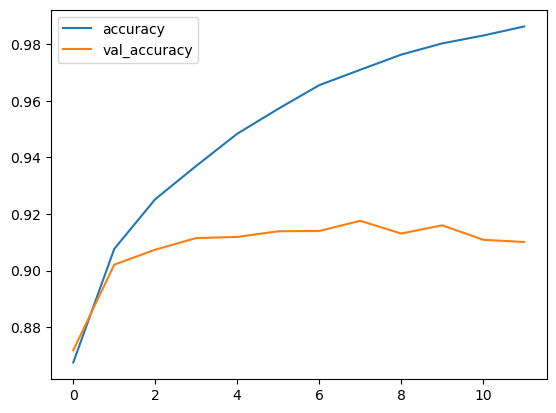

In [38]:
loss_df[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [40]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3208 - accuracy: 0.9176


[0.32076770067214966, 0.9175999760627747]

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.32076770067214966
Test accuracy: 0.9175999760627747


In [42]:
pred_prob = model.predict(X_test)
pred_prob

array([[3.69547615e-10, 5.01848320e-11, 3.80080273e-10, ...,
        6.69220826e-05, 9.36798159e-08, 9.99932170e-01],
       [2.58444244e-09, 1.79398905e-16, 1.00000000e+00, ...,
        1.26109016e-13, 3.38245838e-12, 1.14239747e-15],
       [2.44139171e-12, 1.00000000e+00, 4.29738751e-16, ...,
        2.05918318e-22, 9.79912081e-20, 5.39261883e-24],
       ...,
       [1.49883530e-14, 4.87325742e-16, 2.34458638e-13, ...,
        6.43237201e-15, 1.00000000e+00, 1.41820348e-17],
       [4.39754439e-12, 1.00000000e+00, 1.04777276e-12, ...,
        2.22725262e-17, 8.73197583e-16, 7.42433841e-17],
       [2.85618228e-07, 1.61365534e-07, 3.82244121e-04, ...,
        2.82837218e-03, 1.21578974e-04, 8.70032454e-05]], dtype=float32)

In [43]:
pred_prob.shape

(10000, 10)

In [44]:
pred_prob[0]

array([3.6954761e-10, 5.0184832e-11, 3.8008027e-10, 1.9819519e-09,
       6.2740440e-07, 2.3631377e-07, 2.6750979e-09, 6.6922083e-05,
       9.3679816e-08, 9.9993217e-01], dtype=float32)

In [45]:
np.argmax(pred_prob[0])

9

In [46]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [47]:
y_pred.shape

(10000,)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.83      0.90      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.74      0.78      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [49]:
print(confusion_matrix(y_test, y_pred))

[[873   0  14  19   6   1  83   0   3   1]
 [  1 985   1   6   5   0   1   0   1   0]
 [ 17   0 871   8  68   0  36   0   0   0]
 [ 17   9  12 911  34   0  17   0   0   0]
 [  1   0  45  17 901   0  35   0   1   0]
 [  0   0   0   0   0 975   0  16   0   9]
 [100   1  54  23  72   0 745   0   5   0]
 [  0   0   0   0   0   4   0 963   0  33]
 [  3   2   3   5   3   2   5   1 976   0]
 [  1   0   0   0   0   5   0  18   0 976]]


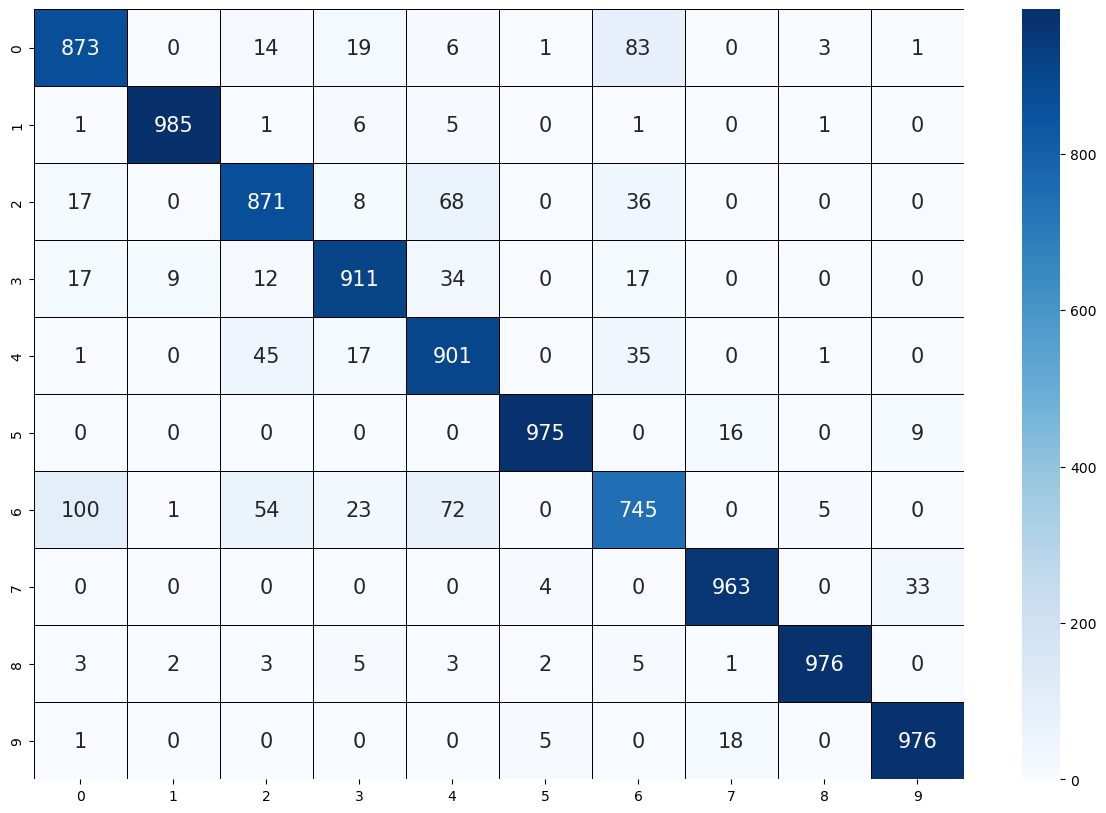

In [50]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [51]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [52]:
np.not_equal(y_test, y_pred).sum()

824

In [53]:
np.equal(y_test, y_pred).sum()

9176

## Prediction

In [54]:
my_number = X_test[3]

In [55]:
my_number.shape

(28, 28, 1)

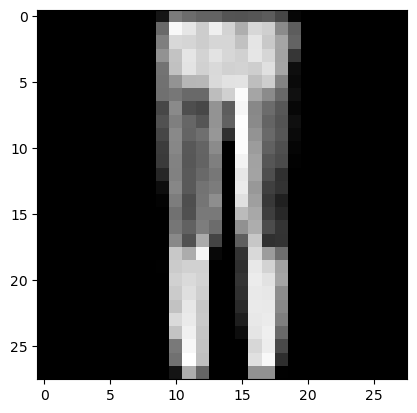

In [56]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [57]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [58]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

array([[8.8819794e-12, 1.0000000e+00, 2.5447475e-17, 6.3866322e-13,
        1.5375213e-12, 1.4357954e-19, 1.1764735e-15, 4.8286906e-19,
        1.2477072e-19, 4.8123588e-20]], dtype=float32)

In [59]:
y_pred = np.argmax(pred_prob)
y_pred

1

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___